In [0]:
import numpy as np
import pandas as pd


In [3]:
from google.colab import files
files.upload()

Saving mushrooms.csv to mushrooms.csv


{'mushrooms.csv': b'class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat\np,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u\ne,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g\ne,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m\np,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u\ne,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g\ne,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g\ne,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m\ne,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m\np,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g\ne,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m\ne,x,y,y,t,l,f,c,b,g,e,c,s,s,w,w,p,w,o,p,n,n,g\ne,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,s,m\ne,b,s,y,t,a,f,c,b,w,e,c,s,s,w,w,p,w,o,p,n,s,g\np,x,y,w,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,v,u\ne,x,f,n,f,n,f,w,b,n,t

In [0]:
data =pd.read_csv("mushrooms.csv")

In [5]:
feature_columns = data.columns[1:]
for i, f in zip(np.arange(1, len(feature_columns) + 1), feature_columns):
    print('feature {:d}:\t{}'.format(i, f))

feature 1:	cap-shape
feature 2:	cap-surface
feature 3:	cap-color
feature 4:	bruises
feature 5:	odor
feature 6:	gill-attachment
feature 7:	gill-spacing
feature 8:	gill-size
feature 9:	gill-color
feature 10:	stalk-shape
feature 11:	stalk-root
feature 12:	stalk-surface-above-ring
feature 13:	stalk-surface-below-ring
feature 14:	stalk-color-above-ring
feature 15:	stalk-color-below-ring
feature 16:	veil-type
feature 17:	veil-color
feature 18:	ring-number
feature 19:	ring-type
feature 20:	spore-print-color
feature 21:	population
feature 22:	habitat


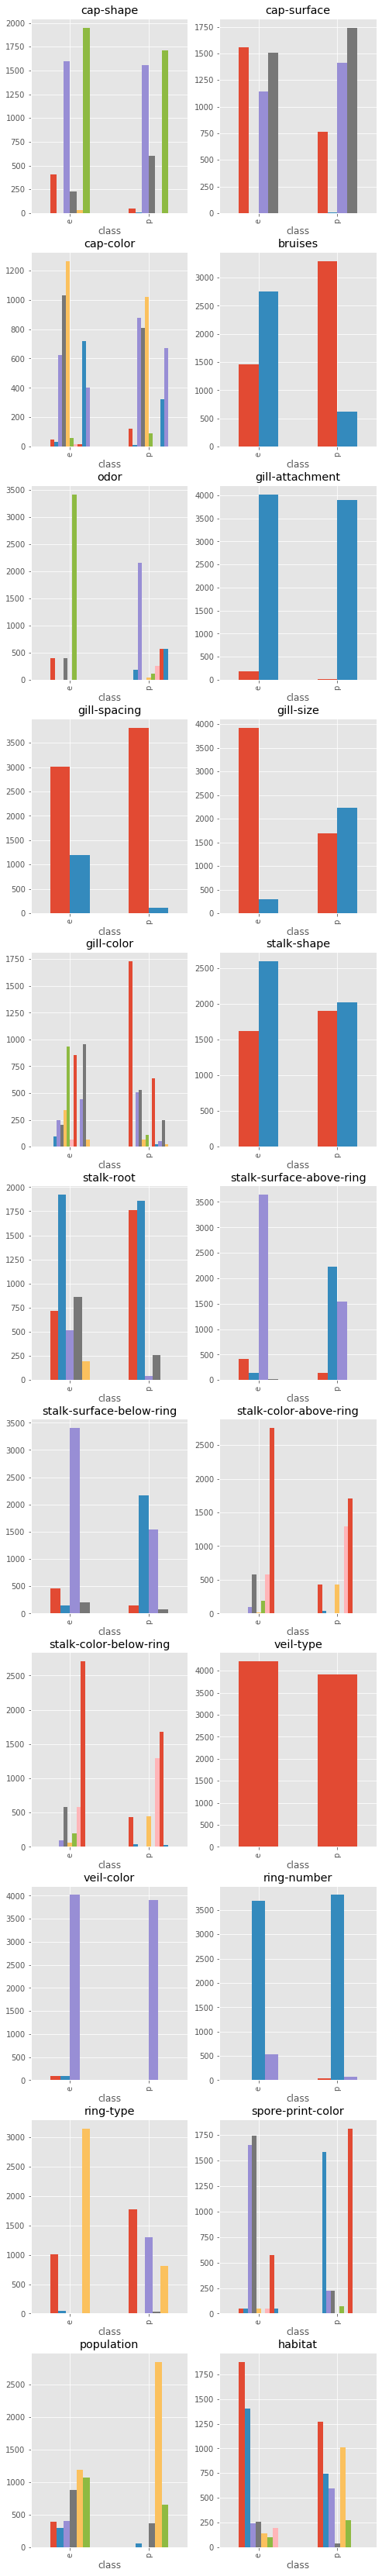

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(8, 60))
data['id'] = np.arange(1, data.shape[0] + 1)

for f, ax in zip(feature_columns, axes.ravel()):
    data.groupby(['class', f])['id'].count().unstack(f).plot(kind='bar', ax=ax, legend=False, grid=True, title=f)

                    features  chi2_statics       p_values
0                 gill-color   5957.764469   0.000000e+00
1                  ring-type   1950.610146   0.000000e+00
2                  gill-size   1636.606833   0.000000e+00
3                    bruises   1194.277352  1.069037e-261
4                 stalk-root   1186.029221  6.630617e-260
5               gill-spacing    826.795274  8.061293e-182
6                    habitat    751.309489  2.082916e-165
7          spore-print-color    379.132729   1.922119e-84
8                 population    311.766736   9.002366e-70
9   stalk-surface-above-ring    222.982400   2.022392e-50
10               cap-surface    214.068544   1.779362e-48
11  stalk-surface-below-ring    206.648180   7.398869e-47
12    stalk-color-above-ring    119.792216   7.024638e-28
13    stalk-color-below-ring    109.789410   1.089740e-25
14                      odor     75.910163   2.968682e-18
15               stalk-shape     36.594105   1.454709e-09
16            

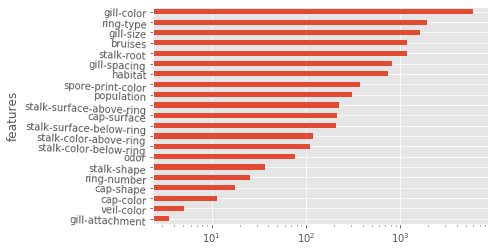

In [7]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
numeric_data = pd.DataFrame()
for f in feature_columns:
    numeric_data[f] = le.fit_transform(data[f])
    
chi_statics, p_values = chi2(numeric_data, data['class'])

chi2_result = pd.DataFrame({'features': feature_columns, 'chi2_statics': chi_statics, 'p_values': p_values})
chi2_result.dropna(axis=0, how='any', inplace=True)

print(chi2_result.sort_values(by='chi2_statics', ascending=False)[['features', 'chi2_statics', 'p_values']].reset_index().drop('index', axis=1))

_ = chi2_result.sort_values(by='chi2_statics', ascending=True).set_index('features')['chi2_statics'].plot(kind='barh', logx=True, rot=-2)